# Load data related to power electronics

In [11]:
from engibench.problems.power_electronics.v0 import PowerElectronics

print("[INFO] Loading dataset from power_electronics")
problem = PowerElectronics()
ds = problem.dataset
{"train": ds["train"].to_pandas(), "val": ds["val"].to_pandas(), "test": ds["test"].to_pandas()}
df_test = ds["test"].to_pandas()

[INFO] Loading dataset from power_electronics


# Data Analysis

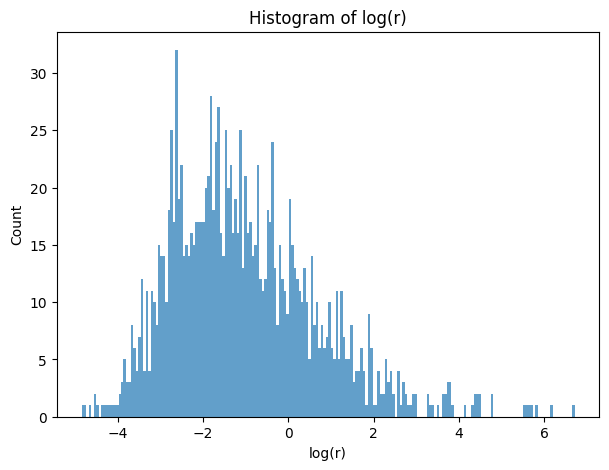

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Compute log(r + 1e-8)
log_r = np.log(df_test["Voltage_Ripple"])

# Histogram
plt.figure(figsize=(7, 5))
plt.hist(log_r, bins=200, alpha=0.7)
plt.xlabel("log(r)")
plt.ylabel("Count")
plt.title("Histogram of log(r)")
plt.show()

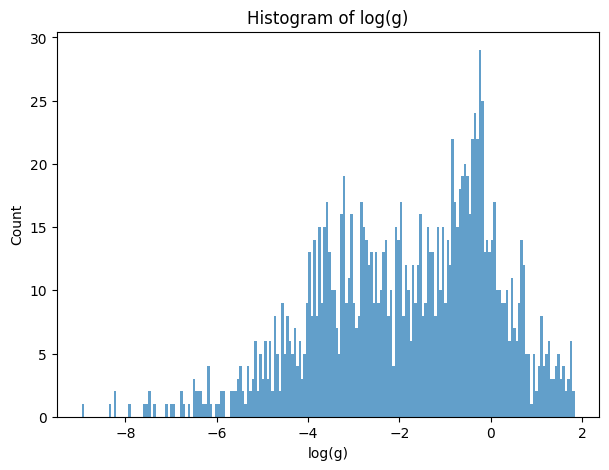

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Compute log(r + 1e-8)
log_g = np.log(df_test["DcGain"])

# Histogram
plt.figure(figsize=(7, 5))
plt.hist(log_g, bins=200, alpha=0.7)
plt.xlabel("log(g)")
plt.ylabel("Count")
plt.title("Histogram of log(g)")
plt.show()

In [7]:
df_test.columns

Index(['initial_design', 'DcGain', 'Voltage_Ripple'], dtype='object')

In [8]:
df_test.describe()

,DcGain,Voltage_Ripple
count,1383.000000,1383.000000
mean,0.583973,4.164992
std,0.954406,32.428571
min,0.000129,0.007811
25%,0.040142,0.100892
50%,0.205809,0.281515
75%,0.718619,1.031684
max,6.293211,830.689200


In [9]:
df_test["initial_design"]

0       [1.1336983289813492e-05, 8.362074166725276e-06...
1       [7.0582242311733215e-06, 1.00603958348501e-05,...
2       [1.8402470791292748e-05, 1.8468282763119614e-0...
3       [1e-06, 1e-06, 2e-05, 1e-06, 2e-05, 2e-05, 0.0...
4       [3.2740880623352055e-06, 4.021212109152507e-06...
                              ...                        
1378    [1.7845478360431024e-06, 4.346925834935858e-06...
1379    [2e-05, 1e-06, 2e-05, 2e-05, 1e-06, 1e-06, 1e-...
1380    [1e-06, 1e-06, 1e-06, 2e-05, 2e-05, 1e-06, 1e-...
1381    [1.1206742324890197e-06, 4.620108745017289e-06...
1382    [3.3463320640288854e-06, 4.301970595844075e-06...
Name: initial_design, Length: 1383, dtype: object

# Hyperparameter tuning with ax platform and botorch in backend

## Output: g

In [20]:
!python bayes_optimize.py \
    --problem_id "power_electronics" \
    --target_col "DcGain" \
    --log_target \
    --params_cols '["initial_design_0","initial_design_1","initial_design_2","initial_design_3","initial_design_4","initial_design_5","initial_design_6","initial_design_7","initial_design_8","initial_design_9"]' \
    --flatten_columns '["initial_design"]' \
    --n_epochs 30 \
    --patience 20 \
    --seed 1 \
    --track \
    --wandb_project "engiopt" \
    --wandb_entity "engibench" \
    --n_ensembles 1 \
    --save_model \
    --model_output_dir "my_models" \
    --test_model \
    --device "mps" \
    --total_trials 50 \
    --learning_rate_bounds 1e-5 1e-3 \
    --hidden_layers_choices 2 3 4 5 \
    --hidden_size_choices 16 32 64 128 256 \
    --batch_size_choices 8 16 32 64 128 \
    --l2_lambda_bounds 1e-6 1e-3 \
    --activation_choices "relu" "tanh"

/Users/ffelte/Documents/EngiLearn/.venv/lib/python3.12/site-packages/gymnasium/spaces/box.py:235: UserWarning: WARN: Box low's precision lowered by casting to float32, current low.dtype=float64
  gym.logger.warn(
/Users/ffelte/Documents/EngiLearn/.venv/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(
[INFO 04-28 16:11:40] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter learning_rate. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 04-28 16:11:40] ax.service.utils.instantiation: Inferred value type of ParameterType.INT for parameter hidden_layers. If that is not the expected value type, you can explicitly specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
/Users/ffelte/Documents/EngiLearn/.venv/lib/python3.12/s

# Hyperparameter tuning with ax platform and botorch in backend

## Output: r

In [15]:
!python bayes_optimize.py \
    --problem_id "power_electronics" \
    --target_col "Voltage_Ripple" \
    --log_target \
    --params_cols '["initial_design_0","initial_design_1","initial_design_2","initial_design_3","initial_design_4","initial_design_5","initial_design_6","initial_design_7","initial_design_8","initial_design_9"]' \
    --flatten_columns '["initial_design"]' \
    --n_epochs 30 \
    --patience 20 \
    --seed 1 \
    --track \
    --wandb_project "engiopt" \
    --wandb_entity "engibench" \
    --n_ensembles 1 \
    --save_model \
    --model_output_dir "my_models" \
    --test_model \
    --device "mps" \
    --total_trials 50 \
    --learning_rate_bounds 1e-5 1e-3 \
    --hidden_layers_choices 2 3 4 5 \
    --hidden_size_choices 16 32 64 128 256 \
    --batch_size_choices 8 16 32 64 128 \
    --l2_lambda_bounds 1e-6 1e-3 \
    --activation_choices "relu" "tanh"

/Users/ffelte/Documents/EngiLearn/.venv/lib/python3.12/site-packages/gymnasium/spaces/box.py:235: UserWarning: WARN: Box low's precision lowered by casting to float32, current low.dtype=float64
  gym.logger.warn(
/Users/ffelte/Documents/EngiLearn/.venv/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(
╭─ Value error ────────────────────────────────────────────────────────────────╮
│ Error parsing --seed: invalid literal for int() with base 10: 'seed'         │
│ ──────────────────────────────────────────────────────────────────────────── │
│ Argument helptext:                                                           │
│     --seed INT                                                               │
│     Random seed. (default: 42)                                               │
│ ──────────────────────────────────────────────────────────────────────────── │
│ For

# Running a test

In [ ]:
!python mlp_tabular_only.py \
    --problem_id "power_electronics" \
    --target_col "DcGain" \
    --log_target \
    --params_cols '["initial_design_0","initial_design_1","initial_design_2","initial_design_3","initial_design_4","initial_design_5","initial_design_6","initial_design_7","initial_design_8","initial_design_9"]' \
    --l2_lambda 1e-6 \
    --flatten_columns '["initial_design"]' \
    --learning_rate 4e-4 \
    --lr_decay 0.95 \
    --activation "relu" \
    --hidden_layers 5 \
    --hidden_size 128 \
    --n_epochs 30 \
    --batch_size 16 \
    --patience 20 \
    --scale_target \
    --track \
    --wandb_project "engiopt" \
    --wandb_entity "engibench" \
    --seed 1 \
    --n_ensembles 2 \
    --save_model \
    --model_output_dir "my_models" \
    --test_model \
    --device "mps"

# Ensemble Creation to predict g

Parameters : {'learning_rate': 0.0005352461015612833, 'hidden_layers': 5, 'hidden_size': 256, 'batch_size': 8, 'l2_lambda': 1e-06, 'activation': 'relu'}

In [ ]:
!python mlp_tabular_only.py \
    --problem_id "power_electronics" \
    --target_col "DcGain" \
    --log_target \
    --params_cols '["initial_design_0","initial_design_1","initial_design_2","initial_design_3","initial_design_4","initial_design_5","initial_design_6","initial_design_7","initial_design_8","initial_design_9"]' \
    --l2_lambda 1e-6 \
    --flatten_columns '["initial_design"]' \
    --learning_rate 0.0005352461015612833 \
    --lr_decay 0.95 \
    --activation "relu" \
    --hidden_layers 5 \
    --hidden_size 256 \
    --n_epochs 150 \
    --batch_size 8 \
    --patience 50 \
    --scale_target \
    --track \
    --wandb_project "engiopt" \
    --wandb_entity "engibench" \
    --seed 1 \
    --n_ensembles 7 \
    --save_model \
    --model_output_dir "my_models" \
    --test_model \
    --device "mps"

# Ensemble Creation to predict r

Parameters : {'learning_rate': 0.00041678932436208844, 'hidden_layers': 4, 'hidden_size': 256, 'batch_size': 32, 'l2_lambda': 0.001, 'activation': 'relu'}
Metric val : ({'objective': 0.0892840633613089}, {'objective': {'objective': 2.446301998255898e-07}})

In [ ]:
!python mlp_tabular_only.py \
    --problem_id "power_electronics" \
    --target_col "Voltage_Ripple" \
    --log_target \
    --params_cols '["initial_design_0","initial_design_1","initial_design_2","initial_design_3","initial_design_4","initial_design_5","initial_design_6","initial_design_7","initial_design_8","initial_design_9"]' \
    --l2_lambda 1e-3 \
    --flatten_columns '["initial_design"]' \
    --learning_rate 0.00041678932436208844 \
    --lr_decay 0.95 \
    --activation "relu" \
    --hidden_layers 4 \
    --hidden_size 256 \
    --n_epochs 150 \
    --batch_size 32 \
    --patience 50 \
    --scale_target \
    --track \
    --wandb_project "engiopt" \
    --wandb_entity "engibench" \
    --seed 1 \
    --n_ensembles 7 \
    --save_model \
    --model_output_dir "my_models" \
    --test_model \
    --device "mps"

# Running inference on one model

In [ ]:
import sys

import numpy as np
import pandas as pd
import torch

import engiopt.surrogate_model.model_pipeline
from engiopt.surrogate_model.model_pipeline import ModelPipeline

sys.modules["model_pipeline"] = engiopt.surrogate_model.model_pipeline


if torch.backends.mps.is_available():
    device = torch.device("mps")
elif torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
print(f"Using device: {device}")

# 1) Load pipeline
pipeline = ModelPipeline.load("my_models/final_pipeline_engiopt__mlp_tabular__18__1744568179_Voltage_Ripple.pkl")

# 2) Prepare new raw data in a DataFrame
raw_data = df_test

# 3) Predict
# Since the pipeline now expects raw input, simply pass the DataFrame.
y_pred = pipeline.predict(raw_data, batch_size=64, device=device)
print("Predictions:", y_pred)

# 4) Evaluate (if you have ground-truth values)
# The evaluate method also expects raw data.
y_true = raw_data[" Voltage_Ripple"]  # For example, substitute with your actual ground-truth array
print("Truth:", y_true)
metrics = pipeline.evaluate(raw_data, y_true, batch_size=64, device=device, metrics=["mse", "rmse", "rel_err", "mae"])
print("Evaluation metrics:", metrics)

# Pymoo optimization

### Run the Optimization

In [ ]:
!python run_pe_optimization.py \
  --model_gain_path  f"{wandb_entity}/{wandb_project}/power_electronics__mlp_tabular__18__1745680073_model:latest" \
  --model_ripple_path f"{wandb_entity}/{wandb_project}/power_electronics__mlp_tabular__18__1745682222_model:latest" \
  --device "mps" \
  --pop_size 500 \
  --n_gen 100 \
  --seed 1 \
  --track \
  --wandb_entity "engibench" \
  --wandb_project "engiopt"

### Visualize the Pareto front

In [ ]:
import plotly.express as px

# Load the combined Pareto front CSV (or use your existing DataFrame)
df_front = pd.read_csv("results/pareto_front.csv")

# Create a scatter plot:
#   - x-axis: predicted r (objective f_r)
#   - y-axis: absolute deviation |g-0.25| (objective f_abs_g_minus_0.25)
#   - hover_data: shows the design variables (C1...T1)
fig = px.scatter(
    df_front,
    x="f0",
    y="f1",
    hover_data=["x0", "x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9"],
    title="Pareto Front of Power Electronics Design Optimization",
    labels={"f0": "|DcGain - 0.25|", "f1": "Voltage_Ripple"},
)

# Optional: improve layout and add interactivity
fig.update_traces(marker={"size": 10, "color": "red", "opacity": 0.8})
fig.update_layout(hovermode="closest")

fig.show()

# MMD 
### Computation between surrogate model Pareto front and its recomputed objective values with baseline problem.simulate()

In [ ]:
from engibench.problems.power_electronics import PowerElectronics
from hyppo.ksample import MMD
import numpy as np
import pandas as pd
import plotly.express as px

# 1) Load your surrogate-computed Pareto front (has x0…x9, f0, f1)
df_front = pd.read_csv("results/pareto_front.csv")
dvars = [f"x{i}" for i in range(10)]
df_X = df_front[dvars]  # noqa: N816

# constant terms for simulation
const_terms = np.array([1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0])

# 2) Simulate each design (with error-catching) and track failures
problem = PowerElectronics()


def simulate_objectives(x_row):
    """Return (|DcGain-0.25|, Voltage_Ripple) or (nan,nan) on failure."""
    try:
        sim = problem.simulate(np.hstack([x_row.to_numpy(), const_terms]))
        return np.abs(sim[0] - 0.25), sim[1]
    except Exception:  # noqa: BLE001
        return np.nan, np.nan


f0_sims, f1_sims = [], []
for _, row in df_X.iterrows():
    f0, f1 = simulate_objectives(row)
    f0_sims.append(f0)
    f1_sims.append(f1)

df_front["f0_sim"] = f0_sims
df_front["f1_sim"] = f1_sims

# Identify failed rows
failed_mask = df_front[["f0_sim", "f1_sim"]].isna().any(axis=1)
n_failed = failed_mask.sum()
failure_rate = n_failed / len(df_front)

# Save the failed designs for inspection
df_front.loc[failed_mask, [*dvars, "f0", "f1"]].to_csv("results/pareto_failures.csv", index=False)

# 3) Prepare two DataFrames—dropping failures—for plotting & MMD
df_valid = df_front.loc[~failed_mask].reset_index(drop=True)

df_pred = (
    df_valid.rename(columns={"f0": "r", "f1": "abs_g"}).assign(kind="Surrogate").loc[:, [*dvars, "r", "abs_g", "kind"]]
)
df_sim = (
    df_valid.rename(columns={"f0_sim": "abs_g", "f1_sim": "r"})
    .assign(kind="Simulated")
    .loc[:, [*dvars, "r", "abs_g", "kind"]]
)
df_both = pd.concat([df_pred, df_sim], ignore_index=True)

# 4) Plot
fig = px.scatter(
    df_both,
    x="r",
    y="abs_g",
    color="kind",
    hover_data=dvars,
    title="Surrogate vs Simulated Pareto Front",
    labels={"r": "|DcGain - 0.25|", "abs_g": "Voltage_Ripple"},
)
fig.update_traces(marker={"size": 9, "opacity": 0.8})
fig.update_layout(legend={"x": 0.02, "y": 0.98}, hovermode="closest")
fig.add_annotation(
    text=f"Simulation failure rate: {failure_rate:.1%} ({n_failed} simulations failed)",
    xref="paper",
    yref="paper",
    x=0.5,
    y=1.05,
    showarrow=False,
)
fig.show()

# 5) Two-sample MMD² test on valid designs only
X = df_pred[["r", "abs_g"]].to_numpy()
Y = df_sim[["r", "abs_g"]].to_numpy()

mmd = MMD(compute_kernel="rbf", bias=False)
stat, p_val = mmd.test(X, Y, reps=1000, auto=False)

print(f"\nMMD² = {stat:.4e}, permutation p-value = {p_val:.3f}")
if p_val < 0.05:  # noqa: PLR2004
    print("→ Clouds differ significantly (reject H₀ at α=0.05)")  # noqa: RUF001
else:
    print("→ No significant difference detected (fail to reject H₀)")

# 6) Save enriched Pareto front (with sim results and failure flags)
df_front.to_csv("results/pareto_front_with_sim.csv", index=False)